 # **Swiggy Sales Analysis**

 <img src="https://www.indifi.com/blog/wp-content/uploads/2019/12/Scaling-Up-The-Outreach-Through-Swiggy-.jpg " alt="Swiggy Sales Analysis" width="90%" height="30%"/>

   # Problem Statement
   # KPI's
   - Total sales: Overall revenue generated from food orders.
   - Average rating: Customer satisfaction level across all restaurants.
   - Average order value: Revenue per order.
   - Rating Count: Total number of customer reviews.
   - Total orders : Number of  food orders recieved.
   # Chart's
   - Monthly Sales Trend: Show how total sales fluctuate month by month.
   - Daily sales Trend:  Highlights order and revenue variation across days of the week.
   - Total Sales by Food Type(Veg vs Non-veg): Compares revenue contribution by cuisine type.
   - Total Sales by State(Map Visualization): Displays state-wise revenue distribution.
   - Quarterly Performance Summary: Combine sales, Ratings, and orders by Quarter.
   - Top 5 cities by Sales: Identifies leading cities contributing the most revenue.
   - Weekly Trend Analysis :Moniter Weekly fluctuation in sales to identify consistency or peak periods.

In [4]:
# Import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Read excel file
df = pd.read_excel("/content/swiggy_data.xlsx")

In [5]:
df.head()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,2025-04-17,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,2025-03-13,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,4.0,0


In [6]:
df.tail()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
197425,Sikkim,Gangtok,2025-01-25,Mama's Kitchen,Gangtok,Momos,Soya cheese chilli momo ...,112.0,4.4,0
197426,Sikkim,Gangtok,2025-07-02,Mama's Kitchen,Gangtok,Momos,Kurkure momo fried ...,140.0,4.4,0
197427,Sikkim,Gangtok,2025-03-25,Mama's Kitchen,Gangtok,Momos,Chilli cheese momo,126.0,4.4,0
197428,Sikkim,Gangtok,2025-03-26,Mama's Kitchen,Gangtok,Momos,Veg Momos (8 Pc),85.0,4.4,0
197429,Sikkim,Gangtok,2025-03-27,Mama's Kitchen,Gangtok,Momos,Soya Momo,100.0,4.4,0


- **Meta data**

In [7]:
print(" No of Rows and column:",df.shape)

 No of Rows and column: (197430, 10)


In [8]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197430 entries, 0 to 197429
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   State            197430 non-null  object        
 1   City             197430 non-null  object        
 2   Order Date       197430 non-null  datetime64[ns]
 3   Restaurant Name  197430 non-null  object        
 4   Location         197430 non-null  object        
 5   Category         197430 non-null  object        
 6   Dish Name        197430 non-null  object        
 7   Price (INR)      197430 non-null  float64       
 8   Rating           197430 non-null  float64       
 9   Rating Count     197430 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 15.1+ MB


In [9]:
# Check the distribution
df.describe()

,Order Date,Price (INR),Rating,Rating Count
count,197430,197430.000000,197430.000000,197430.000000
mean,2025-05-01 19:41:20.996808960,268.512920,4.341582,28.321805
min,2025-01-01 00:00:00,0.950000,1.500000,0.000000
25%,2025-03-01 00:00:00,139.000000,4.300000,0.000000
50%,2025-05-02 00:00:00,229.000000,4.400000,2.000000
75%,2025-07-01 00:00:00,329.000000,4.500000,15.000000
max,2025-08-31 00:00:00,8000.000000,5.000000,999.000000
std,NaN,219.338363,0.422585,87.542593


- **KPI's**
- **Total Sales**

In [10]:
Total_Sales = df["Price (INR)"].sum()
print("Total Sales (INR):", round(Total_Sales,2))

Total Sales (INR): 53012505.77


  -  **Average Rating**

In [11]:
Average_rating = df["Rating"].mean()
print("Average Rating:", round(Average_rating,2))

Average Rating: 4.34


- **Average Order Value**

In [12]:
Average_order_value = df["Price (INR)"].mean()
print("Average Order Value (INR):", round(Average_order_value,2))

Average Order Value (INR): 268.51


-  **Ratings Count**

In [13]:
Ratings_count = df["Rating Count"].sum()
print("Ratings Count:", Ratings_count)

Ratings Count: 5591574


-  **Total Orders**

In [14]:
print("Total Orders:", len(df))

Total Orders: 197430


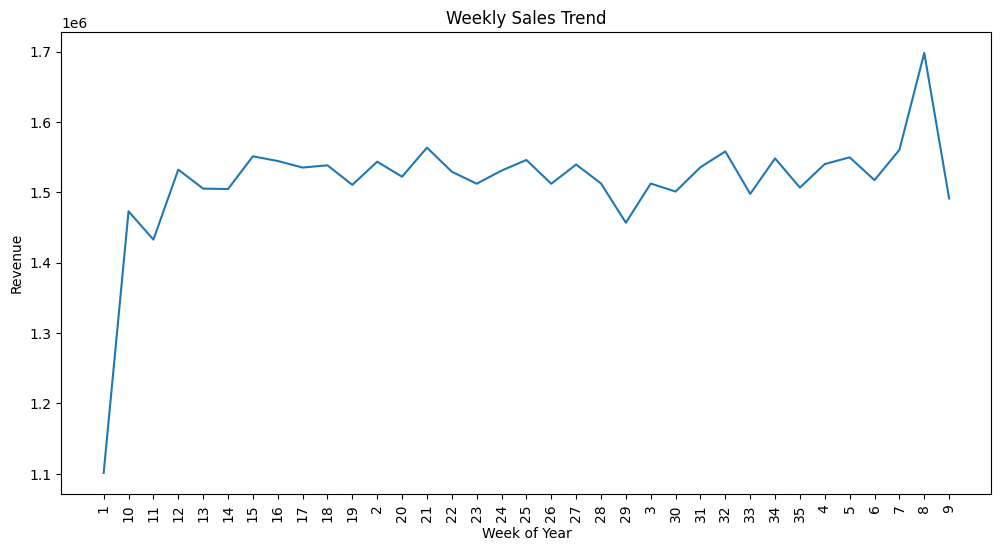

In [25]:
df["WeekofYear"] = df["Order Date"].dt.isocalendar().week.astype(str)
weekly_revenue = df.groupby("WeekofYear")["Price (INR)"].sum().reset_index()

plt.figure(figsize = (12, 6))
plt.plot(weekly_revenue["WeekofYear"], weekly_revenue["Price (INR)"])
plt.xlabel("Week of Year")
plt.ylabel("Revenue")
plt.title("Weekly Sales Trend")
plt.xticks(rotation = 90)
plt.show()

- **Chart's**
  - **Monthly Sales Trend**

In [15]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

df["YearMonth"] = df["Order Date"].dt.to_period("M").astype(str)

monthly_revenue = df.groupby("YearMonth")["Price (INR)"].sum().reset_index()

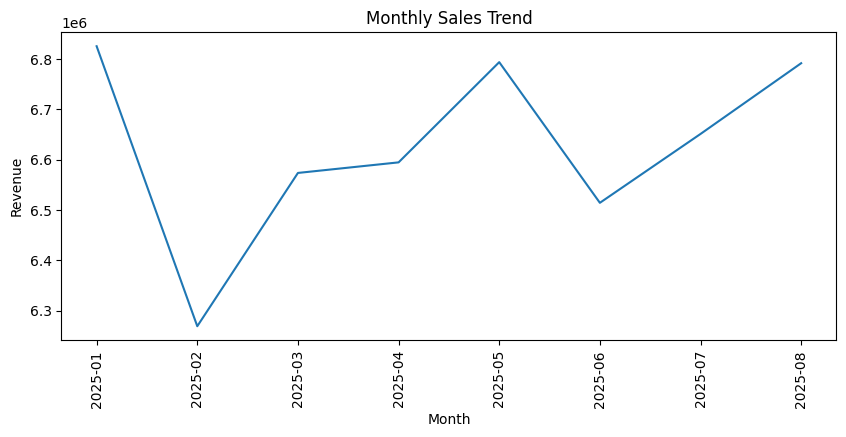

In [16]:
plt.figure(figsize = (10,4))
plt.plot(monthly_revenue["YearMonth"], monthly_revenue["Price (INR)"])
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthly Sales Trend")
plt.show()

 - **Daily Sales Trend**

In [17]:
df['DayName'] = df['Order Date'].dt.day_name()

Daily_revenue = (
        df.groupby('DayName')['Price (INR)']
        .sum()
        .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
        .reset_index()
)

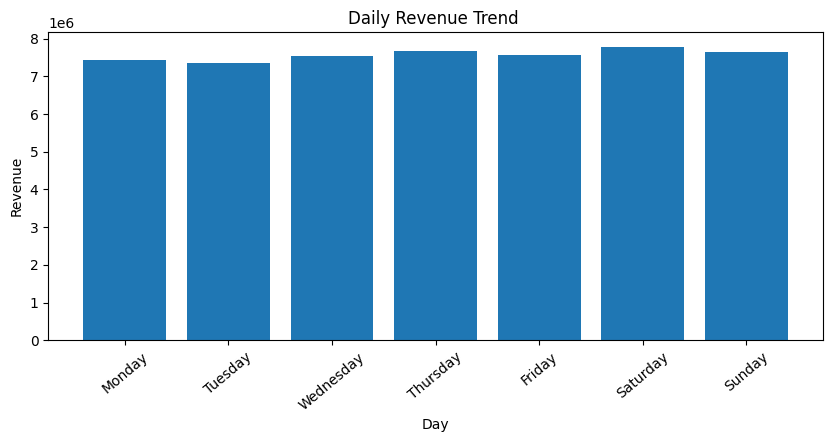

In [29]:
plt.figure(figsize = (10,4))
plt.bar(Daily_revenue['DayName'], Daily_revenue['Price (INR)'])
plt.xticks(rotation = 40)
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.title("Daily Revenue Trend ")
plt.show()
#

 - **Total Sales by Food (Veg vs Non-Veg**)

In [19]:
non_veg_category = ["chicken","egg","fish","mutton","prawn","biryani","kabab",     "non-veg"]

df["Food Category"] = np.where(df["Dish Name"].str.lower().str.contains('|'.join(non_veg_category)), "Non-Veg", "Veg")


In [20]:
food_revenue = df.groupby("Food Category")["Price (INR)"].sum().reset_index()

In [21]:
fig = px.pie(
    food_revenue,
    values = "Price (INR)",
    names = "Food Category",
    hole = 0.5,
    title = "Revenue Contribution: Veg vs Non-Veg",
)

fig.update_traces(textposition = "inside",
                  textinfo = "percent+label",
                  pull = [0.05, 0])

fig.update_layout(
       height = 500,
       margin = dict(t = 60, b = 40, l = 40, r = 40),
       showlegend = True,
)

fig.show()

-  **Total Sales by State**

In [22]:
fig = px.bar(
    df.groupby("State", as_index=False)["Price (INR)"].sum()
    .sort_values(by = "Price (INR)", ascending = False)
    .reset_index(),
    x = "Price (INR)",
    y = "State",
    title = "Total Sales by State",
)

fig.update_layout(height = 600, yaxis = dict(autorange = "reversed"))
fig.show()

- **Quarterly Performance Summary**

In [23]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Quarter"] = df["Order Date"].dt.to_period("Q").astype(str)
quarterly_summary = (
    df.groupby("Quarter", as_index= False)
    .agg(
        Total_Sales = ("Price (INR)", "sum"),
        Average_Rating = ("Rating", "mean"),
        Total_Orders = ("Order Date", "count")
       )
    .sort_values(by = "Quarter")
)

quarterly_summary["Total_Sales"] = round(quarterly_summary["Total_Sales"], 0)
quarterly_summary["Average_Rating"] = round(quarterly_summary ["Average_Rating"], 2)

quarterly_summary

,Quarter,Total_Sales,Average_Rating,Total_Orders
0,2025Q1,19667822.0,4.34,73096
1,2025Q2,19902257.0,4.34,74163
2,2025Q3,13442427.0,4.34,50171


 - **Top 5 Cities by Sales**

In [24]:
top_5_cities = (
    df.groupby("City")["Price (INR)"]
    .sum()
    .nlargest()
    .sort_values()
    .reset_index()
)

fig = px.bar(
    top_5_cities,
    x = "Price (INR)",
    y = "City",
    orientation = "h",
    title = "Top 5 Cities by Sales",
    color_discrete_sequence = ["red"],
)

fig.show()

 - **Weekly Trend Analysis**

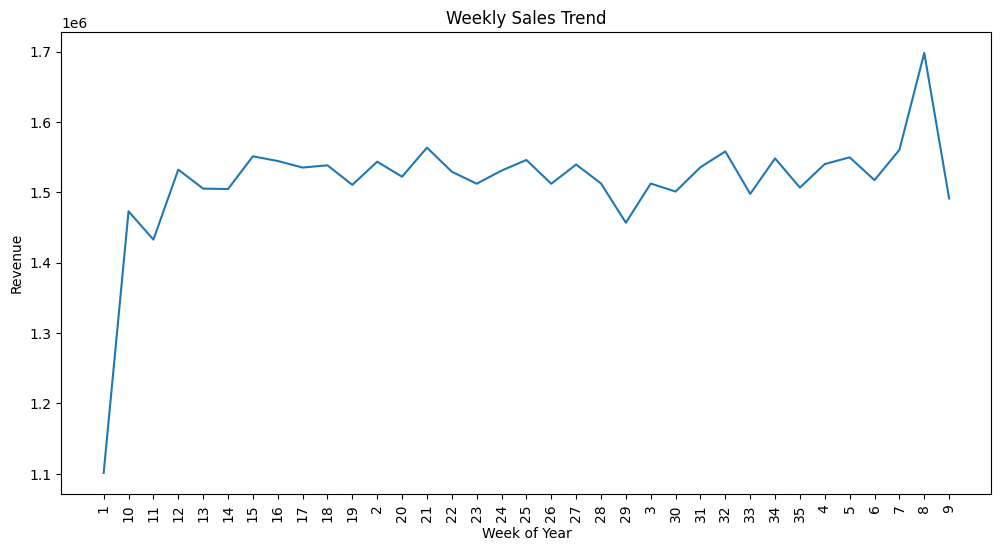

In [30]:
df["WeekofYear"] = df["Order Date"].dt.isocalendar().week.astype(str)
weekly_revenue = df.groupby("WeekofYear")["Price (INR)"].sum().reset_index()

plt.figure(figsize = (12, 6))
plt.plot(weekly_revenue["WeekofYear"], weekly_revenue["Price (INR)"])
plt.xlabel("Week of Year")
plt.ylabel("Revenue")
plt.title("Weekly Sales Trend")
plt.xticks(rotation = 90)
plt.show()

## Conclusion

This analysis of Swiggy sales data from January to August 2025 has provided several key insights into the platform's performance:

*   **Total Sales:** The platform generated a total revenue of **53,012,505.77 INR** from food orders.
*   **Customer Satisfaction:** The average rating across all restaurants is **4.34**, indicating a generally high level of customer satisfaction.
*   **Order Value:** The average order value stands at **268.51 INR**.
*   **Order Volume:** A total of **197,430** orders were placed, with **5,591,574** ratings recorded.

### Sales Trends:
*   **Monthly Sales:** Sales show fluctuations throughout the year, with notable peaks and troughs that could be further investigated for seasonality or specific events.
*   **Daily Sales:** Sales tend to be consistent across weekdays, with potential slight increases on weekends, as indicated by the daily revenue trend.
*   **Weekly Sales:** The weekly sales trend also shows variations, which could be influenced by holidays or promotional periods.
*   **Quarterly Performance:** The quarterly summary shows consistent average ratings across quarters, with variations in total sales and orders, indicating steady operational performance.

### Food Category and Geographical Insights:
*   **Food Category Contribution:** **Vegetarian dishes contribute significantly more to the revenue (64.22%)** compared to Non-Veg dishes (35.78%).
*   **Top Performing States:** The total sales by state chart highlights the regions with the highest revenue generation, indicating strong market presence in those areas.
*   **Top Performing Cities:** **Bengaluru, Lucknow, Hyderabad, Mumbai, and New Delhi are the top 5 cities by sales**, underscoring their importance as key markets for Swiggy.